<a href="https://colab.research.google.com/github/suradet-spd/TestColab/blob/main/SEC_Open_Data_Service_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

พี่อั้มเกริ่น basic กองทุน และ use case coolๆ (finnomena) -> รู้หรือไม่ว่าเราก็สามารถทำเองได้ โดยใ ช้ open data จาก กลต

# Data Analysis with SEC Open Data


CASE \
 เคส: “คุณแนน อายุ 25 ปี ทำงานมาได้ 2 ปี อยากเริ่มลงทุนในกองทุนรวมเพื่อเก็บเงินซื้อบ้านภายใน 5 ปีข้างหน้า โดยต้องการผลตอบแทนที่ดีกว่าฝากธนาคาร แต่ก็ไม่อยากเสี่ยงมาก”

# Part I : Data Extraction (New)

🎯 **เป้าหมายของคอร์ส**
* เข้าใจพื้นฐานของ API, Python และ JSON ว่าคืออะไรและทำงานยังไง
* รู้จัก SEC Open API
* สามารถใช้ Python ดึงข้อมูลจากเว็บ (API)




## พื้นฐานของ API, Python And JSON

### API คืออะไร?

*API เปรียบเหมือนการถามข้อมูลจากระบบหนึ่ง แล้วระบบนั้นตอบกลับมาให้เรา*



ตัวอย่าง:
- เราอยากรู้ว่า "กองทุน A ที่จะลงทุนมีมูลค่าเท่าใหร่?"
- เราถามเว็บของ ก.ล.ต. ผ่าน API
- API จะตอบกลับมา เช่น "ราคาหน่วยละ 10 บาท"

----------- ใส่รูป -----------

### Python คืออะไร ?

*python is ....*

In [ ]:
print('Hello world')

Hello world


### JSON คือ?

*JSON คือ รูปแบบการเก็บข้อมูลแบบหนึ่ง หน้าตาจะคล้ายๆ กล่องข้อมูลที่มีป้ายบอกชื่อ*



In [ ]:
CatBox = {
    "name": "กาฟิว",
    "age": "3",
    "activity": "นอน"
}

print(CatBox["name"])

กาฟิว


## SEC Open API


Service : [SEC Open API](https://api-portal.sec.or.th/) <- กดได้นะครับไม่ใช่ phishing 🤣

### SEC API คืออะไร และมีข้อมูลอะไรบ้าง ?



> SEC API คือ เป็นระบบการให้บริการเผยแพร่ข้อมูลที่อยู่ในความครอบครองของ ก.ล.ต.แบบอัตโนมัติ ไปยังระบบ หรือซอฟต์แวร์ของผู้ใช้บริการในรูปแบบที่คอมพิวเตอร์สามารถประมวลผลได้ทันที



**ชุดข้อมูลที่มีเปิดเผยบน SEC API**


1. <a href="https://api-portal.sec.or.th/product#product=bond-api" target="_blank">Bond : ข้อมูลเกี่ยวกับตราสารหนี้</a>
2. <a href="https://api-portal.sec.or.th/product#product=common" target="_blank">Common : ข้อมูลอ้างอิงที่ใช้ร่วม</a>
3. <a href="https://api-portal.sec.or.th/product#product=digital-asset" target="_blank">Digital Asset : ข้อมูลเกี่ยวกับสินทรัพย์ดิจิทัล</a>
4. <a href="https://api-portal.sec.or.th/product#product=fund-daily-info" target="_blank">Fund Daily Info : ข้อมูลเกี่ยวกับกองทุนรายวัน</a>
5. <a href="https://api-portal.sec.or.th/product#product=5a27b5eaec421012dc0bd217" target="_blank">Fund Factsheet : ข้อมูลเกี่ยวกับกองทุน</a>
6. <a href="https://api-portal.sec.or.th/product#product=5a27b5a1ec421012dc0bd216" target="_blank">License Check : ข้อมูลนิติบุคคลที่ได้รับใบอนุญาต/บุคคลที่ได้รับความเห็นชอบ</a>
5. <a href="https://api-portal.sec.or.th/product#product=fund-daily-info" target="_blank">One Report API :
ข้อมูลเกี่ยวกับรายงานประจำปี</a>
5. <a href="https://api-portal.sec.or.th/product#product=pvd-factsheet-dev" target="_blank">PVD Factsheet : ข้อมูลเกี่ยวกับกองทุนสำรองเลี้ยงชีพ</a>

***ย้ำอีกครั้งว่า click link ได้นะ ไม่ใช่ phishing*** 😆

### การสมัครใช้งาน

🔥Link : [sign up](https://api-portal.sec.or.th/signup)

> จะ Sign up แบบใช้ email / password ตัวเองก็ได้หรือจะใช้เป็น social account ในการ sign up ก็ได้ (เลือกได้นะว่าจะใช้เป็น Facebook, Google account หรือ Microsoft account)

<p>อย่างเช่น : </p>

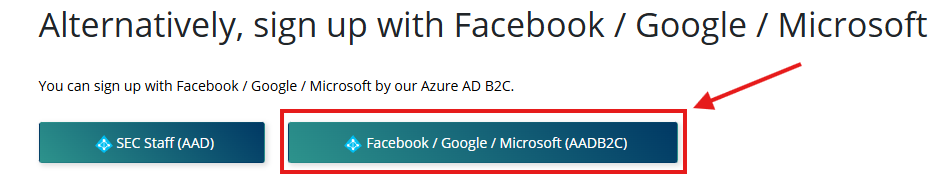

<p>หลังจากกดตามรูปด้านบนแล้ว นี่เป็นตัวอย่าง Email verify นะ</p>

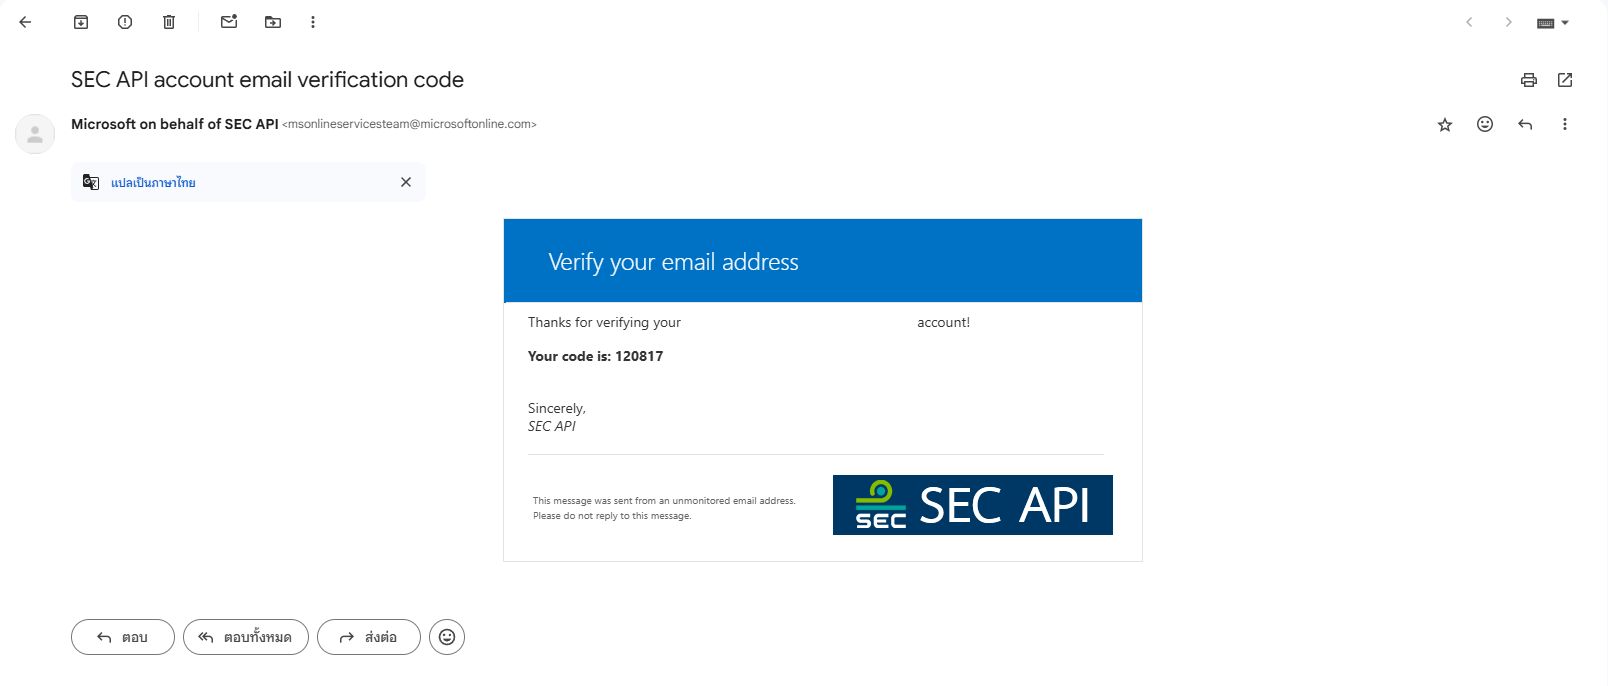


### การ Subscribe

🔥 Link : [Product](https://api-portal.sec.or.th/products)

**ก่อนอื่นก็ต้องไปที่ Menu : Products ก่อน ตามรูป** 👇
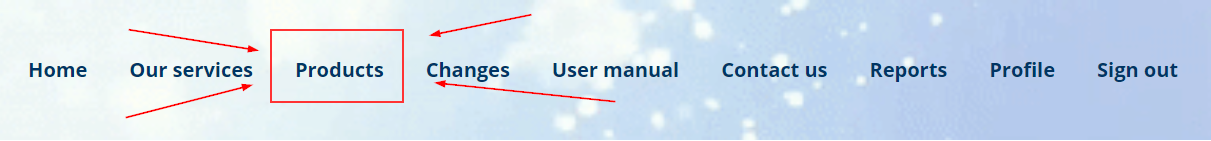

จากนั้นก็เลือก product ที่ต้องการ subscribe
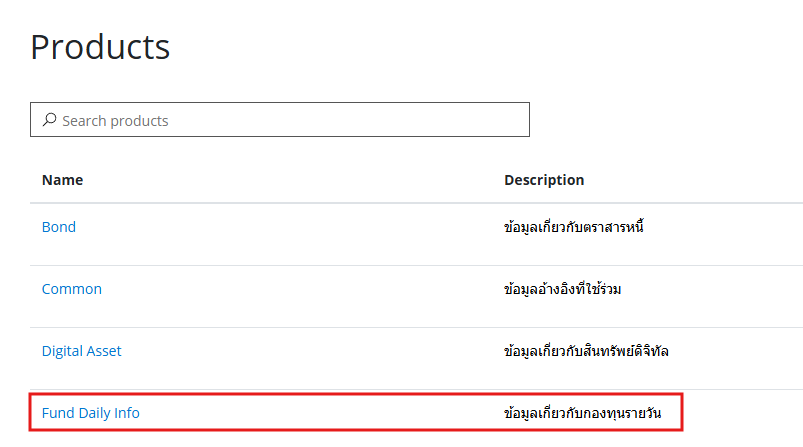

จากนั้นใส่ชื่อที่ต้องการ "Ex : API-Tutorial" แล้วกด "Subscribe"
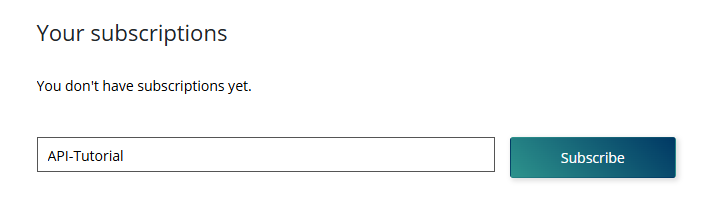

## การดึงข้อมูลจาก API ด้วย Python

### การดึง API แบบไม่มี Parameter
*แค่มี url กับ key ก็ดึงข้อมูลได้เลย ไม่จำเป็นต้องส่ง parameter บางอย่างกลับไปให้กับ API*

In [ ]:
# Import library
import requests
import sys

# import custom lib
sys.path.append('/content/lib/sample_data')
import responseCat as Cat

# replace subscription key
SubscriptionKey = "8f9f8c25235d4befb3668446a52d82e8"

# set URL Endpoint
api_url = "https://api.sec.or.th/FundFactsheet/fund/amc"

# Request headers
headers = {
    "Content-type":"application/json",
    "Accept":"application/json",
    "cache-control" : "no-cache",
    "Ocp-Apim-Subscription-Key" : SubscriptionKey
}

# Call API
response = requests.get(url=api_url, headers=headers)

# check data
Cat.print_cat(response.status_code)

ModuleNotFoundError: No module named 'responseCat'

### การดึง API แบบมี Parameter

*สำหรับ SEC API จะมีอยู่ 2 ประเภทคือ*
* Path Parameters
* Body Parameters



#### Path Parameters

> คือข้อมูลที่เราใส่ไว้ใน “ที่อยู่ (URL)” ของ API เพื่อบอกว่าอยากดูข้อมูลของใคร หรือของอะไร



In [ ]:
# Import library
import requests
import sys

# import custom lib
sys.path.append('/content/lib/sample_data')
import responseCat as Cat

# replace subscription key
SubscriptionKey = "8f9f8c25235d4befb3668446a52d82e8"

# set URL Endpoint
api_url = "https://api.sec.or.th/FundFactsheet/fund/amc/C0000000023"

# Request headers
headers = {
    "Content-type":"application/json",
    "Accept":"application/json",
    "cache-control" : "no-cache",
    "Ocp-Apim-Subscription-Key" : SubscriptionKey
}

# Call API
response = requests.get(url=api_url, headers=headers)

# check data
Cat.print_cat(response.status_code)

#### Body Parameters

> คือข้อมูลที่เรา "ส่งแนบไปกับคำขอ" โดยไม่ได้ใส่ไว้ใน URL แต่ใส่ไว้ในเนื้อของคำขอ (body) แทน



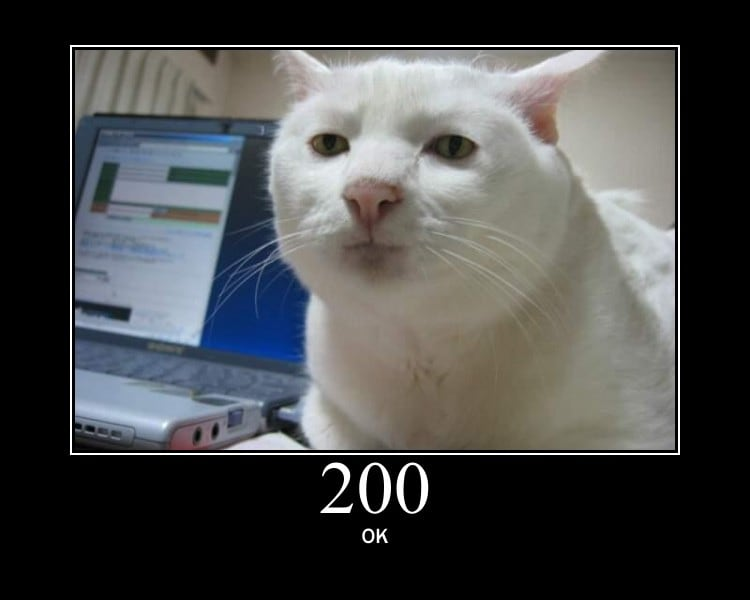

In [ ]:
# Import library
import requests
import sys

# import custom lib
sys.path.append('/content/lib/sample_data')
import responseCat as Cat

# replace subscription key
SubscriptionKey = "8f9f8c25235d4befb3668446a52d82e8"

# set URL Endpoint
api_url = "https://api.sec.or.th/FundFactsheet/fund"

# Request headers
headers = {
    "Content-type":"application/json",
    "Accept":"application/json",
    "cache-control" : "no-cache",
    "Ocp-Apim-Subscription-Key" : SubscriptionKey
}

# Parameter <--
Parameter = {
    "name": "กำไร"
}

# Call API
response = requests.post(url=api_url, headers=headers, json=Parameter)

# check data
Cat.print_cat(response.status_code)

### การดึงข้อมูลแบบใช้ loop

#### Loop คืออะไร?
*Loop (ลูป) คือคำสั่งที่สั่งให้คอมพิวเตอร์ ทำซ้ำๆ แบบเดิมหลายครั้ง โดยไม่ต้องเขียนคำสั่งซ้ำเอง*

เหมือนเราอยากให้เพื่อนนับเลข 1 ถึง 5
ถ้าไม่มีลูป ต้องบอกว่า:
* บอกเลข 1
* บอกเลข 2
* บอกเลข 3
* บอกเลข 4
* บอกเลข 5

แต่ถ้าใช้ลูป:
“ให้บอกเลขตั้งแต่ 1 ถึง 5 ทีละ 1” แค่นี้จบ!

In [ ]:
# Example code without loop
print("บอกเลข 1")
print("บอกเลข 2")
print("บอกเลข 3")
print("บอกเลข 4")
print("บอกเลข 5")

In [ ]:
# Example code with loop
for i in range(0,5):
  print(f"บอกเลข {i + 1}")

#### Loop กับ SEC API

In [ ]:
# Import library
import requests
import sys
import pandas as pd

# import custom lib
sys.path.append('/content/lib/sample_data')
import responseCat as Cat

# replace subscription key
SubscriptionKey = "8f9f8c25235d4befb3668446a52d82e8"

# set URL Endpoint
api_url = "https://api.sec.or.th/FundFactsheet/fund/amc/"

# Request headers
headers = {
    "Content-type":"application/json",
    "Accept":"application/json",
    "cache-control" : "no-cache",
    "Ocp-Apim-Subscription-Key" : SubscriptionKey
}

# Call API
response = requests.get(url=api_url, headers=headers)

# check status_code before create dataframe
if response.status_code != 200:
  Cat.print_cat(response.status_code)
else:
  # Create data frame with json string
  amc = json_normalize(response.json())
  df_Fund = pd.DataFrame()

  for idx, row in amc.iterrows():
    # Concatenate [fund_url] for GET API with loop.
    api_fund_url = "https://api.sec.or.th/FundFactsheet/fund/amc/{}".format(row.unique_id)

    fund_response = requests.get(url=api_fund_url, headers=headers)

    # check status_code before create dataframe
    if fund_response.status_code != 200:
      print(f"unique_id : {row.unique_id} can't get fund list [error code {fund_response.status_code}]")
    else:
      # print status
      print(f"get fund list from unique_id : {row.unique_id} complete!")
      # create dataframe with json string
      df_FundList = json_normalize(fund_response.json())

      # concat dataframe
      df_Fund = pd.concat([df_FundList, df_Fund], axis=False)

  display(df_Fund)

## การนำข้อมูลที่ได้จาก API ไปใช้งานต่อ

In [ ]:
from pandas import json_normalize
import json

# response.json()

# convert json string to dataframe
df = json_normalize(response.json())

# output
display(df)

## Part I : Mini lab 💪

## Mini lab 💪

ให้น้อง ๆ เขียน Python โดยการดึง API แล้วใส่ Dataframe ดังนี้

<u>Section : 1</u>
* **fund_list_df** : ใช้ข้อมูลจาก Dataframe ที่ชื่อ <u>df_Fund</u> จาก *Ex : 2 ดึงตรง ๆ แบบใช้ Loop ในการวนดึงข้อมูล* (ใครยังไม่ได้ทำ....โชคดีนะ 😁)
* **fund_list_df** : filter ให้เหลือแต่คอลัมน์ <u>fund_status = "RG"</u> (ใครไม่ filter รันไม่ผ่านนะ 🤣)

<u>Section : 2</u>

ดึงข้อมูลจาก API ข้ออื่น ๆ โดยเขียน loop จาก <u>fund_list_df</u> แล้วเอาไปดึง


* **fund_policy_df** : โดยใช้ข้อมูลจาก [08. ประเภทกองทุนตามนโยบายกองทุน](https://api-portal.sec.or.th/api-details#api=5a28f6df2b3a6d1788d2025c&operation=08-%E0%B8%9B%E0%B8%A3%E0%B8%B0%E0%B9%80%E0%B8%A0%E0%B8%97%E0%B8%81%E0%B8%AD%E0%B8%87%E0%B8%97%E0%B8%B8%E0%B8%99%E0%B8%95%E0%B8%B2%E0%B8%A1%E0%B8%99%E0%B9%82%E0%B8%A2%E0%B8%9A%E0%B8%B2%E0%B8%A2%E0%B8%81%E0%B8%AD%E0%B8%87%E0%B8%97%E0%B8%B8%E0%B8%99)
* **fund_special_feature_df** : ใช้ข้อมูลจาก [09. ประเภทกองทุนตามลักษณะพิเศษ](https://api-portal.sec.or.th/api-details#api=5a28f6df2b3a6d1788d2025c&operation=09-%E0%B8%9B%E0%B8%A3%E0%B8%B0%E0%B9%80%E0%B8%A0%E0%B8%97%E0%B8%81%E0%B8%AD%E0%B8%87%E0%B8%97%E0%B8%B8%E0%B8%99%E0%B8%95%E0%B8%B2%E0%B8%A1%E0%B8%A5%E0%B8%B1%E0%B8%81%E0%B8%A9%E0%B8%93%E0%B8%B0%E0%B8%9E%E0%B8%B4%E0%B9%80%E0%B8%A8%E0%B8%A9)
* **fund_risk_df** : ใช้ข้อมูลจาก [12. ความเหมาะสมกับผู้ลงทุนและความเสี่ยงของกองทุน](https://api-portal.sec.or.th/api-details#api=5a28f6df2b3a6d1788d2025c&operation=12-%E0%B8%84%E0%B8%A7%E0%B8%B2%E0%B8%A1%E0%B9%80%E0%B8%AB%E0%B8%A1%E0%B8%B2%E0%B8%B0%E0%B8%AA%E0%B8%A1%E0%B8%81%E0%B8%B1%E0%B8%9A%E0%B8%9C%E0%B8%B9%E0%B9%89%E0%B8%A5%E0%B8%87%E0%B8%97%E0%B8%B8%E0%B8%99%E0%B9%81%E0%B8%A5%E0%B8%B0%E0%B8%84%E0%B8%A7%E0%B8%B2%E0%B8%A1%E0%B9%80%E0%B8%AA%E0%B8%B5%E0%B9%88%E0%B8%A2%E0%B8%87%E0%B8%82%E0%B8%AD%E0%B8%87%E0%B8%81%E0%B8%AD%E0%B8%87%E0%B8%97%E0%B8%B8%E0%B8%99)
* **fund_allot_df** : ใช้ข้อมูลจาก [14. สัดส่วนประเภททรัพย์สินที่ลงทุนของกองทุน](https://api-portal.sec.or.th/api-details#api=5a28f6df2b3a6d1788d2025c&operation=14-%E0%B8%AA%E0%B8%B1%E0%B8%94%E0%B8%AA%E0%B9%88%E0%B8%A7%E0%B8%99%E0%B8%9B%E0%B8%A3%E0%B8%B0%E0%B9%80%E0%B8%A0%E0%B8%97%E0%B8%97%E0%B8%A3%E0%B8%B1%E0%B8%9E%E0%B8%A2%E0%B9%8C%E0%B8%AA%E0%B8%B4%E0%B8%99%E0%B8%97%E0%B8%B5%E0%B9%88%E0%B8%A5%E0%B8%87%E0%B8%97%E0%B8%B8%E0%B8%99%E0%B8%82%E0%B8%AD%E0%B8%87%E0%B8%81%E0%B8%AD%E0%B8%87%E0%B8%97%E0%B8%B8%E0%B8%99)
* **fund_performance_df** : ใช้ข้อมูลจาก [22. ผลการดำเนินงานย้อนหลังของกองทุน](https://api-portal.sec.or.th/api-details#api=5a28f6df2b3a6d1788d2025c&operation=21-%E0%B8%9C%E0%B8%A5%E0%B8%81%E0%B8%B2%E0%B8%A3%E0%B8%94%E0%B8%B3%E0%B9%80%E0%B8%99%E0%B8%B4%E0%B8%99%E0%B8%87%E0%B8%B2%E0%B8%99%E0%B8%A2%E0%B9%89%E0%B8%AD%E0%B8%99%E0%B8%AB%E0%B8%A5%E0%B8%B1%E0%B8%87%E0%B8%82%E0%B8%AD%E0%B8%87%E0%B8%81%E0%B8%AD%E0%B8%87%E0%B8%97%E0%B8%B8%E0%B8%99)

<strong><u>สำคัญที่สุด</u></strong>
* ทุก ๆ การดึง API ให้เช็ค status_code ด้วยว่าเป็น 200 หรือไม่ ข้อมูลที่จะเอามาใส่ใน DataFrame นั้นจะต้องมี Status_code = 200 เท่านั้น !!!!

<h3>Happy coding 😁</h3>

In [ ]:
# # Mini Lab
# import pandas as pd
# import json
# import requests

# # custom function
# def RemoveBase64Col(ResponseAPI, ColumnList):
#   print("========> using removeBase64Col")
#   json_data = ResponseAPI.json()
#   remove_base64_col = {key: value for key, value in json_data.items() if key not in ColumnList}
#   return remove_base64_col

# # Section : 1

# # using [df_Fund] and filtered
# amc_filter_list = ['C0000005022', 'C0000000239', 'C0000000460']

# fund_list_df = df_Fund[(df_Fund["unique_id"].isin(amc_filter_list)) & (df_Fund["fund_status"] == "RG")]


# # Section : 2

# # Set URL endpoint
# endpoint_url = 'https://api.sec.or.th/FundFactsheet/fund/{}'

# # Set request header
# headers = {
#     "Content-type":"application/json",
#     "Accept":"application/json",
#     "cache-control" : "no-cache",
#     "Ocp-Apim-Subscription-Key" : "bc4c9c8f57824724b4a1fef69912701f" # Replace "XXXX" with your subscription key
# }

# # create empty data frame
# fund_policy_df = pd.DataFrame()
# fund_special_feature_df = pd.DataFrame()
# fund_risk_df = pd.DataFrame()
# fund_allot_df = pd.DataFrame()
# fund_performance_df = pd.DataFrame()

# # loop [df_Fund] and get fund details
# idx = 1
# for proj_id in fund_list_df["proj_id"]:
#   print(f"{idx} fund : {proj_id}")
#   idx = idx + 1
#   # Call api for get fund details

#   ### policy
#   policy_res = requests.get(url=endpoint_url.format(f"{proj_id}/policy"), headers=headers)
#   print(f"====> policy : {policy_res.status_code}")

#   if policy_res.status_code == 200:
#     js_policy = RemoveBase64Col(policy_res, ['investment_policy_desc'])
#     temp_policy_df = pd.DataFrame(js_policy, index=[0])
#     fund_policy_df = pd.concat([fund_policy_df, temp_policy_df], axis=False)

#   ### special_feature
#   special_feature_res = requests.get(url=endpoint_url.format(f"{proj_id}/specification"), headers=headers)
#   print(f"====> special feature : {special_feature_res.status_code}")

#   if special_feature_res.status_code == 200:
#     temp_special_feature_df = pd.DataFrame(special_feature_res.json())
#     fund_special_feature_df = pd.concat([fund_special_feature_df, temp_special_feature_df], axis=False)

#   ### allot
#   allot_res = requests.get(url=endpoint_url.format(f"{proj_id}/asset"), headers=headers)
#   print(f"====> allot : {allot_res.status_code}")

#   if allot_res.status_code == 200:
#     temp_allot_df = pd.DataFrame(allot_res.json())
#     fund_allot_df = pd.concat([fund_allot_df, temp_allot_df], axis=False)

#   ### performance
#   performance_res = requests.get(url=endpoint_url.format(f"{proj_id}/performance"), headers=headers)
#   print(f"====> performance : {performance_res.status_code}")

#   if performance_res.status_code == 200:
#     temp_performance_df = pd.DataFrame(performance_res.json())
#     fund_performance_df = pd.concat([fund_performance_df, temp_performance_df], axis=False)

In [ ]:
# Write code here 🎉
import pandas as pd
import json
import requests
from concurrent.futures import ThreadPoolExecutor

# Custom function
def RemoveBase64Col(ResponseAPI, ColumnList):
    json_data = ResponseAPI.json()
    remove_base64_col = {key: value for key, value in json_data.items() if key not in ColumnList}
    return remove_base64_col

# Section : 1

# Using [df_Fund] and filtered
fund_list_df = df_Fund[df_Fund["fund_status"] == "RG"]

# Section : 2

# Set URL endpoint
endpoint_url = 'https://api.sec.or.th/FundFactsheet/fund/{}'

# Set request header
headers = {
    "Content-type": "application/json",
    "Accept": "application/json",
    "cache-control": "no-cache",
    "Ocp-Apim-Subscription-Key": "bc4c9c8f57824724b4a1fef69912701f"  # Replace "XXXX" with your subscription key
}

# Create empty lists to collect DataFrames
policy_dfs = []
special_feature_dfs = []
allot_dfs = []
performance_dfs = []

# Function to make API calls
def make_api_call(url, proj_id, data_list, column_to_remove=None):
    res = requests.get(url, headers=headers)
    if res.status_code == 200:
        if column_to_remove:
            data = RemoveBase64Col(res, column_to_remove)
        else:
            data = res.json()
        df = pd.DataFrame(data, index=[0] if column_to_remove else None)
        df['proj_id'] = proj_id
        data_list.append(df)

# Function to fetch and process data
def fetch_data(proj_id):
    # print(f"Fetching data for fund: {proj_id}")

    urls = [
        (f"{endpoint_url.format(proj_id)}/policy", policy_dfs, ['investment_policy_desc']),
        (f"{endpoint_url.format(proj_id)}/specification", special_feature_dfs),
        (f"{endpoint_url.format(proj_id)}/asset", allot_dfs),
        (f"{endpoint_url.format(proj_id)}/performance", performance_dfs)
    ]

    with ThreadPoolExecutor(max_workers=4) as executor:
        for url, data_list, *column_to_remove in urls:
            executor.submit(make_api_call, url, proj_id, data_list, *column_to_remove)

# Use ThreadPoolExecutor to make concurrent requests
with ThreadPoolExecutor(max_workers=10) as executor:
    executor.map(fetch_data, fund_list_df["proj_id"])

# Concatenate DataFrames
fund_policy_df = pd.concat(policy_dfs, ignore_index=True)
fund_special_feature_df = pd.concat(special_feature_dfs, ignore_index=True)
fund_allot_df = pd.concat(allot_dfs, ignore_index=True)
fund_performance_df = pd.concat(performance_dfs, ignore_index=True)

print("Data fetching and processing complete.")


# Part II : Data Preparation

In [ ]:
#checkpoint: read all df from json
import pandas as pd
import json


# content = json.loads(open('/content/fund_list_df.json', mode='r', encoding='utf-8').read())
# fund_list_df = pd.read_json(content)

# 8 fund_policy
content = json.loads(open('/content/fund_policy_df.json', mode='r', encoding='utf-8').read())
fund_policy_df = pd.read_json(content)

# 9 fund_special_feature
content = json.loads(open('/content/fund_special_feature_df.json', mode='r', encoding='utf-8').read())
fund_special_feature_df = pd.read_json(content)

content = json.loads(open('/content/fund_risk_df.json', mode='r', encoding='utf-8').read())
fund_risk_df = pd.read_json(content)

content = json.loads(open('/content/fund_allot_df.json', mode='r', encoding='utf-8').read())
fund_allot_df = pd.read_json(content)

content = json.loads(open('/content/fund_performance_df.json', mode='r', encoding='utf-8').read())
fund_performance_df = pd.read_json(content)

## Part II : Why Data Preparation ?

  <p>
  หลังจากที่เราได้ข้อมูลมาจาก API แล้ว (และไม่ว่าจะมาจากแหล่งไหนๆ) สิ่งที่เราไม่ควรทำคือการเชื่อข้อมูลทั้งหมด
  </p>
  <p>
  เพราะการทำงานกับข้อมูลในชีวิตจริง การใช้ข้อมูลที่ไม่มีคุณภาพจะทำให้ผลลัพธ์ที่เรากำลังหาสามารถคลาดเคลื่อนจากความเป็นจริงได้
  </p>
  <p>
  เราเลยต้องมาทำ <b>"Data Preparation"</b> ✨
  </p>

## Part II : What is Data Preparation ?

<p>
<b>Data Preparation</b> หรือเรียกสั้นๆว่า <b>data prep</b>
</p>
คือการดัดแปลงให้ข้อมูลอยู่ในสภาพที่เพียงพอที่จะเป็น <b>"Good data"</b> สำหรับการนำไปใช้งานต่อในการวิเคราะห์หรือเทรนโมเดล 🤖📊

<div>
<img src="https://armyaviationmagazine.com/images/articles/20_06/2006_sf_data.jpg"></img>
</div>
credit : <a href="https://armyaviationmagazine.com/the-power-of-data-analytics-in-aviation-sustainment/" target="_blank">https://armyaviationmagazine.com/the-power-of-data-analytics-in-aviation-sustainment/</a>

## Part II : แล้วต้องทำยังไงถึงจะมี Good data ได้ ? 🤷‍♂️🤷‍♂️

<p>
  checklist เบื้องต้นในการทำให้ข้อมูลเป็น Good data
</p>
<li> business domain - ความเข้าใจใน business ก่อนที่จะทำการคลีนข้อมูล
<li> missing value - ข้อมูลหายไปเพราะอะไร
<li> duplicated row - ข้อมูลซ้ำเพราะอะไร ซ้ำจริงหรือไม่
<li> data range (outlier) - ใช้ทั้งความเข้าใจทาง business และค่าทางสถิติมาประกอบการตัดสินใจ
<li> data format - ข้อมูลอยู่ในรูปแบบที่เหมาะสมแล้วหรือยัง

In [ ]:
# dataframe size (rows, columns)
fund_performance_df.shape

In [ ]:
# print information about dataframe
fund_performance_df.info()

In [ ]:
# see first five rows
fund_performance_df.head()

In [ ]:
# see last five rows
fund_performance_df.tail()

## Part II : Count missing value

In [ ]:
# basic stat of dataframe
fund_performance_df_stat = fund_performance_df.describe(include='all').T

display(fund_performance_df_stat)

In [ ]:
all_rows = fund_performance_df.shape[0];

# add null percentage column
fund_performance_df_stat.assign(percent_null = lambda x: ((all_rows-x['count'])/all_rows)*100).sort_values('percent_null', ascending=False)

## Part II : Check duplicated row

In [ ]:
# filter row that duplicate on all columns
fund_performance_df.duplicated().sum()

## Part II : Convert data to proper format

In [ ]:
# view data types
fund_performance_df.dtypes

In [ ]:
# convert date columns to datetime data type
fund_performance_df['performance_val'] = pd.to_numeric(fund_performance_df['performance_val'], errors='coerce')


In [ ]:
# view new data types
fund_performance_df.dtypes

## Part II : เตรียมข้อมูลรายละเอียดกองทุน (Fund Profile)

**API ข้อ 2 : รายชื่อกองทุน**

In [ ]:
# 2 fund_list
fund_list_df = fund_list_df[['proj_id', 'proj_abbr_name']]

**API ข้อ 8 : นโยบายกองทุน**

In [ ]:
# 8 fund_policy
fund_policy_df = fund_policy_df[['proj_id', 'policy_desc']]

In [ ]:
# check distinct value of policies
fund_policy_df['policy_desc'].unique()

In [ ]:
def classifyPolicy(row):
    try:
      if 'ผสม' in row:
        return 'ผสม'
      elif 'หนี้' in row:
        return 'ตราสารหนี้'
      elif 'ทุน' in row:
        return 'ตราสารทุน'
      elif 'อื่น' in row:
        return 'อื่นๆ'
      elif 'ทรัพย์สินทางเลือก' in row:
        return 'ทรัพย์สินทางเลือก'
      else:
        return row
    except:
      return row

fund_policy_df['policy_desc'] = fund_policy_df['policy_desc'].apply(classifyPolicy)


In [ ]:
# check distinct value of policies
fund_policy_df['policy_desc'].unique()

In [ ]:
# drop records contain null policy_desc
fund_policy_df = fund_policy_df[~fund_policy_df['policy_desc'].isna()]

**API ข้อ 9 : ลักษณะพิเศษกองทุน**

In [ ]:
# 9 fund_special_feature
fund_special_feature_df = fund_special_feature_df[['proj_id', 'spec_code']]


## Part II : Joining DataFrame

In [ ]:
# merge all fund profile dataframes together
fund_df = pd.merge(fund_list_df, fund_policy_df, how='left', on='proj_id')
fund_df = pd.merge(fund_df, fund_special_feature_df, how='left', on='proj_id')


## Part II : Additional cleansing for Data Analysis

In [ ]:
# filter only actual fund return
condition1 = (fund_performance_df['performance_type_desc'].str.match('ผลตอบแทนกองทุนรวม'))
condition2 = fund_performance_df['reference_period'].isin(['ตั้งแต่จัดตั้ง', '3_month', '6_month', '1_year', '5_year', '10_year'])
filtered_df = fund_performance_df[condition1 & condition2]


In [ ]:
# pivot period data to be columns
pivoted_df = filtered_df.pivot(index=['proj_id', 'class_abbr_name'], columns='reference_period', values='performance_val')
pivoted_df.reset_index(inplace=True)


In [ ]:
# filter only actual return
condition1 = (fund_performance_df['performance_type_desc'].str.match('ผลตอบแทนกองทุนรวม'))
condition2 = fund_performance_df['reference_period'].isin(['ตั้งแต่จัดตั้ง', '3_month', '6_month', '1_year', '5_year', '10_year'])
filtered_df = fund_performance_df[condition1 & condition2]

# pivot period data to be columns
pivoted_df = filtered_df.pivot(index=['proj_id', 'class_abbr_name'], columns='reference_period', values='performance_val')
pivoted_df.reset_index(inplace=True)

# join to fund_df
merged_df = pd.merge(fund_df, pivoted_df, how='inner', on='proj_id')

# fill class_abbr_name with proj_abbr_name if fund class is not exists
merged_df.loc[merged_df['class_abbr_name']=='-', 'class_abbr_name'] = merged_df['proj_abbr_name']
fund_performance_df = merged_df.copy()


In [ ]:
fund_performance_df.head()

## Part II : Mini Lab: Data Prep 💪

<u>Lab instruction</u> ลองเตรียมข้อมูลสัดส่วนประเภททรัพย์สินที่ลงทุนของกองทุนโดยต้องมีคุณสมบัติดังนี้


1.   ตั้งชื่อว่า fund_allot_df
2.   ต้องประกอบไปด้วย 7 columns ดังนี้
    *   proj_id
    *   proj_abbr_name
    *   policy_desc
    *   spec_code
    *   asset_name
    *   asset_seq
    *   asset_ratio
3.   คอลัมภ์ asset_ratio ต้องมี data type เป็น float





**API ข้อ 14 : สัดส่วนประเภททรัพย์สินที่ลงทุน**

In [ ]:
# print information of dataframe
fund_allot_df.info()

In [ ]:
# see first five rows
# start typing here...
'''fund_allot_df.head()'''

In [ ]:
# check missing value
'''fund_allot_df.describe().T'''

In [ ]:
fund_allot_df.describe().T

In [ ]:
# check duplicated row
# start typing here...
'''fund_allot_df.duplicated().sum()'''

In [ ]:
# convert numeric column to numeric data type
# start typing here...
fund_allot_df['asset_ratio'] = pd.to_numeric(fund_allot_df['asset_ratio'], errors='coerce')

In [ ]:
# check data range
# start typing here...
fund_allot_df.hist('asset_ratio')

In [ ]:
# 14 fund_allot
fund_allot_df = fund_allot_df[['proj_id', 'asset_name', 'asset_seq', 'asset_ratio']]

# join to fund_df
# start typing here...
fund_allot_df = pd.merge(fund_df, fund_allot_df, how='inner', on='proj_id')

# Part III : Exploratory Data Analysis (EDA) & Analysis on Mutual Fund Data

## Part III : What's an <u>EDA</u>?


**กระบวนการ EDA (Exploratory Data Analysis)** **หรือ การวิเคราะห์ข้อมูลเชิงสำรวจ** คือ กระบวนการตรวจสอบและสำรวจข้อมูลเบื้องต้น เพื่อทำความเข้าใจชุดข้อมูล รวมถึงการจัดระเบียบข้อมูล ที่จำเป็นก่อนการนำข้อมูลไปใช้หรือนำไปวิเคราะห์เชิงลึก\
ประโยชน์ของการทำ EDA : จะช่วยทำให้เราเข้าใจพื้นฐานเกี่ยวกับข้อมูลชุดนั้นและเป็นการตรวจความผิดพลาดของชุดข้อมูลได้อีกด้วย 💡

### Part III : มาทวนกันก่อนว่าเรามีข้อมูลอะไรอยู่ในมือบ้าง! 📌

<ul>
  <li>fund_df : โปรไฟล์ของกองทุน </li>
  <li>fund_performance_df : ผลตอบแทนของกองทุน</li>
  <li>fund_allot_df : สัดส่วนประเภททรัพย์สินที่ลงทุนของกองทุน </li>
</ul>

In [ ]:
## Return
display(fund_performance_df)

In [ ]:
## Asset Allocation
display(fund_allot_df)

In [ ]:
fund_performance_df = fund_performance_df[fund_performance_df['policy_desc'].notna()]
display(fund_performance_df)

## Part III : <u>เริ่มวิเคราะห์ข้อมูลกันเถอะ</u> ! 😎

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

### Part III : กองทุนมีกี่ประเภท อะไรบ้างน้า ?





In [ ]:
import matplotlib.font_manager as fm
import numpy as np

# Download and register a Thai font
# For this example, we'll use the Sarabun font, which supports Thai characters
import urllib.request
import os

font_url = "https://github.com/cadsondemak/Sarabun/raw/master/fonts/Sarabun-Regular.ttf"
font_path = "Sarabun-Regular.ttf"

if not os.path.exists(font_path):
    urllib.request.urlretrieve(font_url, font_path)

# Register the font
thai_font = fm.FontProperties(fname=font_path)


In [ ]:
# distribution of policy
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

# Assuming font_prop is already defined and loaded
# Example: font_prop = FontProperties(fname='path_to_your_font.ttf')

# Create the count plot with custom font properties
sns.countplot(fund_performance_df, x='policy_desc')

# Set the title with custom font
plt.title('Number of funds across policy', fontproperties=thai_font)

# Set the y-label with custom font
plt.ylabel('Number of funds', fontproperties=thai_font)

# Set the x-ticks with custom font
plt.xticks(fontproperties=thai_font)

# Show the plot
plt.show()


In [ ]:
# Group by 'policy_desc' and count the unique 'proj_id' in each group(policy_desc)
policy_proj_count = fund_performance_df.groupby("policy_desc")["proj_id"].nunique()
display(policy_proj_count)

In [ ]:
# Convert the Series to a DataFrame
policy_proj_df = policy_proj_count.reset_index()
policy_proj_df.columns = ['policy_desc', 'num_funds']

# Plot using barchart
sns.barplot(x='policy_desc', y='num_funds', data=policy_proj_df)

# Set plot labels and title
plt.title('Number of Funds across Policy')
# Set the x-ticks with custom font
plt.xticks(fontproperties=thai_font)
plt.ylabel('Number of Funds')

# Display the plot
plt.show()


In [ ]:
# Plot the pie chart
plt.figure(figsize=(10, 8))
policy_proj_count.plot.pie(
    autopct="%.1f%%",           # Display percentages
    startangle=90,              # Start the pie chart at 90 degrees
    wedgeprops={'linewidth': 1, 'edgecolor': 'white'},
    textprops={'fontproperties' : thai_font}  # Apply Thai font to the pie chart text
)

# Add a title to the pie chart
plt.title('Percentage of Mutual Funds based on Investment Policy')

# Remove the default ylabel
plt.ylabel('')
plt.tight_layout()

# Display the pie chart
plt.show()


จากทุกประเภทกองทุนจะเห็นว่ากองที่มีจำนวนกองทุนมากที่สุดและใกล้เคียงกัน คือ Equity(ตราสารทุน) และ Bond (ตราสารหนี้)


ลองดูย้อนหลังหลายๆปีดูบ้าง

In [ ]:
# category wise returns

# Create figure and axis objects
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 6),sharey='row')

# Create a bar plot for each axis
sns.barplot(fund_performance_df,x='policy_desc',y= '3_month',ax=axes[0])
sns.barplot(fund_performance_df,x='policy_desc',y='6_month',ax=axes[1])
sns.barplot(fund_performance_df,x='policy_desc',y='1_year',ax=axes[2])

# Set the title for each axis
axes[0].set_title('Returns over 3 month')
axes[0].set_xticklabels(fund_performance_df['policy_desc'].unique(),rotation='vertical', fontproperties=thai_font)
axes[1].set_title('Returns over 6 month')
axes[1].set_xticklabels(fund_performance_df['policy_desc'].unique(),rotation='vertical', fontproperties=thai_font)
axes[2].set_title('Returns over 1 year')
axes[2].set_xticklabels(fund_performance_df['policy_desc'].unique(),rotation='vertical', fontproperties=thai_font)


# Add legends for the mean lines
for ax in axes:
    ax.legend()
# Add labels for the y-axis
for ax in axes:
    ax.set_ylabel('Return (%)')
plt.show()

### แล้วประเภทกองตาม**ลักษณะพิเศษ**มีอะไรบ้าง ?
*  RMF : กองทุนรวมเพื่อการเลี้ยงชีพ (ล่งเสริมให้เกิดการออมเงินในระยะยาวสำหรับใช้จ่ายยามเกษียณอายุ + มีสิทธิลดหย่อนภาษี)
*  SSF : กองทุนรวมเพื่อการออม
*  LTF : กองทุนรวมหุ้นระยะยาว
*  TESG : กองทุนรวมไทยเพื่อความยั่งยืน

In [ ]:
# Count the number of unique proj_id for each spec_code
spec_code_count = fund_performance_df.groupby('spec_code')['proj_id'].nunique().reset_index()
spec_code_count.columns = ['spec_code', 'num_funds']

# Plotting
plt.figure(figsize=(10, 8))
sns.barplot(data=spec_code_count, y='spec_code', x='num_funds', palette="Blues_d")

# Set plot labels and title
plt.title('Number of Funds by Specification')
plt.xlabel('Number of Funds')
plt.ylabel('Specification Code')

# Display the plot
plt.show()


ลองเอาทั้งประเภทกองตามนโยบายการลงทุนและลักษณะพิเศษมาดูด้วยกันดีกว่า ! 🤔

In [ ]:
fund_performance_df_drop =  fund_performance_df[['proj_id', 'policy_desc', 'spec_code']].drop_duplicates().copy()
display(fund_performance_df_drop)

In [ ]:
# Policy With Specification

plt.figure(figsize=(8,10))
sns.heatmap(pd.crosstab(fund_performance_df_drop['spec_code'],fund_performance_df_drop['policy_desc']),annot=True,fmt='g') #ทุก spec code

# sns.heatmap(pd.crosstab(fund_performance_df[fund_performance_df['spec_code'].isin(['RMF', 'SSF', 'LTF', 'TESG'])], fund_performance_df['policy_desc']),annot=True,fmt='g')

# sns.heatmap(pd.crosstab(fund_performance_df['policy_desc']),annot=True,fmt='g')
plt.title('Number of funds across specification by policy ')
# Set the x and y ticks with Thai font
plt.xticks(fontproperties=thai_font)


plt.show()

จากข้างบนจะเห็นว่ากองตราสารทุน และกองตราสารหนี้เป็นกองยอดฮิต มีจำนวนกองเยอะ และ ผลตอบแทนย้อนหลังก็มีแนวโน้มดี

**แล้วกองยอดฮิตเหล่านี้ มีผลตอบแทนดีไหม?**



ตราสารทุน

In [ ]:
# returns of equity policy  over 1 year, 3 year, 5 year
equity_df = fund_performance_df[fund_performance_df['policy_desc'] == 'ตราสารทุน']
# Create figure and axis objects
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 8),sharey='row')

# Create a bar plot for each axis
sns.barplot(equity_df,x='spec_code',y='3_month',ax=axes[0])
sns.barplot(equity_df,x='spec_code',y='6_month',ax=axes[1])
sns.barplot(equity_df,x='spec_code',y='1_year',ax=axes[2])
sns.barplot(equity_df,x='spec_code',y='5_year',ax=axes[3])


# Set the title for each axis
axes[0].set_title('Returns over 3_month for equity funds')
axes[0].set_xticklabels(equity_df['spec_code'].unique(),rotation='vertical')
axes[1].set_title('Returns over 6_month for equity funds')
axes[1].set_xticklabels(equity_df['spec_code'].unique(),rotation='vertical')
axes[2].set_title('Returns over 1_year for equity funds')
axes[2].set_xticklabels(equity_df['spec_code'].unique(),rotation='vertical')
axes[3].set_title('Returns over 5_year for equity funds')
axes[3].set_xticklabels(equity_df['spec_code'].unique(),rotation='vertical')

plt.tight_layout()
plt.show()

##<u>YOUT TURN</u> ! 😎

ผสม

In [ ]:
# # returns of mix policy over 3_month, 6_month, 1 year, 5 year,
# mix_df =  fund_performance_df[fund_performance_df['policy_desc'] == 'ผสม']
# # Create figure and axis objects
# fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 8),sharey='row')

# # Create a bar plot for each axis
# sns.barplot(mix_df,x='spec_code',y='3_month',ax=axes[0])
# sns.barplot(mix_df,x='spec_code',y='6_month',ax=axes[1])
# sns.barplot(mix_df,x='spec_code',y='1_year',ax=axes[2])
# sns.barplot(mix_df,x='spec_code',y='5_year',ax=axes[3])


# # Set the title for each axis
# axes[0].set_title('Returns over 3_month for equity funds')
# axes[0].set_xticklabels(mix_df['spec_code'].unique(),rotation='vertical')
# axes[1].set_title('Returns over 6_month for equity funds')
# axes[1].set_xticklabels(mix_df['spec_code'].unique(),rotation='vertical')
# axes[2].set_title('Returns over 1_year for equity funds')
# axes[2].set_xticklabels(mix_df['spec_code'].unique(),rotation='vertical')
# axes[3].set_title('Returns over 5_year for equity funds')
# axes[3].set_xticklabels(mix_df['spec_code'].unique(),rotation='vertical')

# plt.tight_layout()
# plt.show()

## **Recap กันหน่อย ⚡**

---



## Part III : PvP 🎮

<img src="https://http.cat/409.jpg">

In [ ]:
display(fund_performance_df)

จับคู่แล้ว เลือกกองโล้ดดด ☝ :

In [ ]:
your_fund = ''
your_friend_fund = ''

## Part III : ผลตอบแทนใครมากกว่ากัน ❗

ดูแนวโน้ม return ว่าเป็นยังไง

In [ ]:
fund_performance_df_sorted = fund_performance_df.sort_values(by='1_year', ascending=False)

# Select the top 10 funds with the highest return rates
top_20_funds = fund_performance_df.head(20)
display(top_20_funds)

In [ ]:
top_20_funds.loc[:,['10_year',	'1_year',	'3_month',	'5_year',	'6_month',	'ตั้งแต่จัดตั้ง']] = top_20_funds.loc[:, ['10_year',	'1_year',	'3_month',	'5_year',	'6_month',	'ตั้งแต่จัดตั้ง']].fillna(0)

In [ ]:
top_20_funds

In [ ]:
barWidth = 0.25
labels=['3 Month Return', '6 Month Return', '1 Year Return']

X = top_20_funds['class_abbr_name']
Y1 = top_20_funds['3_month'].astype(float)
Y2 = top_20_funds['6_month'].astype(float)
Y3 = top_20_funds['1_year'].astype(float)

# Set position of bar on X axis
r1 = np.arange(len(Y1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

plt.bar(r1, Y1, color='red', width=0.25, edgecolor='white', label='var1')
plt.bar(r2, Y2, color='orange', width=0.25, edgecolor='white', label='var2')
plt.bar(r3, Y3, color='deepskyblue', width=0.25, edgecolor='white', label='var3')
plt.xlabel('group', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(Y1))], X, rotation='vertical')
plt.rcParams['figure.figsize']=(20,10)
plt.rcParams['font.size'] = 14
plt.xlabel('Mutual Funds', fontsize=24, fontname="Comic Sans MS")
plt.ylabel('Returns in percentage', fontsize=24, fontname="Comic Sans MS" )
plt.grid()
plt.title('3 month. vs 6 month. vs 1month Returns(%)', y=1.20, fontsize='24', fontname="Comic Sans MS")
plt.legend(labels,loc='upper right', bbox_to_anchor=(1.0,1.0), fontsize=15)
plt.rcParams['figure.figsize']=(20,6)
plt.rcParams['font.size'] = 14

plt.show()

<u>YOUT TURN</u> ! 😎

ผลตอบแทนของกองเราเป็นเท่าไหร่บ้าง ?

In [ ]:
# Extract the data for the bar chart
my_fund_df = fund_performance_df[fund_performance_df['class_abbr_name'] == 'HIDIV-D']

# Specify the periods to be plotted
x_columns = [ '3_month', '6_month', '1_year', '5_year', '10_year']
y_values = my_fund_df[x_columns].values.tolist()[0]

# Determine the color for each bar
colors = ['green' if float(value) > 0 else 'red' for value in y_values]

# Create the bar chart
plt.bar(x_columns, y_values, color=colors)
plt.xlabel('Return Period')
plt.ylabel('Return Value')
plt.title('Return in Each Period')
plt.xticks(rotation=45, ha='right')  # Rotate x-labels for readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()


แล้วของเรา VS ของเพื่อนล่ะ

In [ ]:
# Extract the data for the bar chart
our_fund_df = fund_performance_df[fund_performance_df['class_abbr_name'].isin(['HIDIV-D', 'ES-FINTECH'])]

# Specify columns for the comparison
columns = [ '3_month','6_month', '1_year', '5_year', '10_year',  ]

# Group the DataFrame by fund
fund_groups = our_fund_df.groupby('class_abbr_name')

# Create a bar chart for each fund with different colors
fig, ax = plt.subplots(figsize=(12, 6))

for class_abbr_name, fund_data in fund_groups:
    y_values = fund_data[columns].values.tolist()[0]  # Assuming you want the first row for each fund
    if class_abbr_name == 'HIDIV-D':
        color = 'blue'
    elif class_abbr_name == 'ES-FINTECH':
        color = 'green'
    else:
        color = 'gray'  # Default color if needed

    ax.bar([col + ' ' + class_abbr_name for col in columns], y_values, label=class_abbr_name, color=color)

# Adding labels, title, and legend
plt.xlabel('Time Periods')
plt.ylabel('Return')
plt.title('Comparing Two Funds')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()


## Challenge Time : ✨

แล้วกองของเรากับเพื่อนไปลงทุนในอะไรบ้างน้า (Asset Allocation) ?

In [ ]:
display(fund_allot_df)

In [ ]:
# Extract the data for the pie charts
filter_fund_allot_df = fund_allot_df[fund_allot_df['proj_id'].isin(['M0000_2552', 'M0050_2564'])]

filter_fund_allot_pie_df =  filter_fund_allot_df[['proj_id', 'asset_name', 'asset_ratio']].drop_duplicates().copy()
display(filter_fund_allot_pie_df)

In [ ]:
# Create subplots for each of the funds
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# Iterate through each proj_id to create a pie chart
for i, proj_id in enumerate(filter_fund_allot_pie_df['proj_id'].unique()):
    fund_data = filter_fund_allot_pie_df[filter_fund_allot_df['proj_id'] == proj_id]
    axes[i].pie(fund_data['asset_ratio'], labels=fund_data['asset_name'], autopct='%1.1f%%', startangle=140 , textprops={'fontproperties' : thai_font})
    axes[i].set_title(f"Fund ID: {proj_id}")

plt.tight_layout()
plt.show()


### Asset Allocation !


**ลิสต์กองทุนที่น่าสนใจ และเป็นกอง RMF**


*   ASP-DIGIBLOCRMF (M0497_2564)
*   ONE-UGERMF-A (M0637_2559)
*   ES-GLOBALEQRMF (M0681_2556)
*   SCBRMGWP (M0935_2554)
*   PWINRMF(M0382_2563)